<a href="https://colab.research.google.com/github/AnastasiaTale/Analytics/blob/main/HR_Analytics_Employee_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HR-аналитика**

Набор данных получен с веб-сайта Kaggle : https://www.kaggle.com/giripujar/hr-analytics#HR_comma_sep.csv


**Задачи:**

1.  Понять, какие факторы больше всего влияют на текучесть кадров.
2.  Создайте модель, которая может предсказать, покинет ли определенный сотрудник компанию или нет.

**Интерпретация данных**

Удовлетворенность сотрудников, годы в компании и оценка были тремя основными факторами в определении текучести кадров.


*   Сотрудники с низкими и средними зарплатами чаще покидают компанию. Замечено, что сотрудники с высокими зарплатами реже всего покидают компанию.
*   Текучесть кадров высока в отделах Продажи, Техника, Поддержка. Отдел управления имеет наименьшую текучесть кадров.
*   Туронвер сотрудников высок для сотрудников с 2,6 и 7 проектами. Большинство сотрудников с 3,4,5 проектами не покинули компанию. Все сотрудники с 7 проектами покинули компанию.
*   Сотрудники с низкой и высокой производительностью, как правило, больше покидают компанию. Сладкое пятно для сотрудников, которые остались, находится в пределах оценки 0,6-0,8
*   Сотрудники, у которых было меньше часов работы (150 часов или меньше), больше покидали компанию. Сотрудники, у которых было слишком много часов работы (250 или более), покинули компанию Сотрудники, которые ушли, как правило, были недоработаны или перегружены работой.
*   Сотрудники, у которых был действительно низкий уровень удовлетворенности (0,2 или менее), покинули компанию больше Сотрудники, у которых был низкий уровень удовлетворенности (0,3 ~ 0,5), покинули компанию больше Сотрудники, у которых был действительно высокий уровень удовлетворенности (0,7 или более), покинули компанию больше.
*   Более половины сотрудников с 4 и 5 годами покинули компанию.
*   Похоже, что сотрудники, которые не покинули компанию, имели среднюю оценку около 70% даже с разными проектами. Тем не менее, существует огромный перекос в сотрудниках, у которых была текучесть кадров. Он кардинально меняется после 3 projectCounts. Сотрудники, у которых было два проекта и ужасная оценка, ушли. Остались сотрудники с более чем 3 проектами и сверхвысокими оценками.

**Модель для анализа данных :** Случайный лес






    









**Шаг 1: Получение данных**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Шаг 2: Очистка данных**

Обычно очистка данных требует много работы и может быть очень утомительной процедурой. Этот набор данных из Kaggle очень чистый и не содержит пропущенных значений.

In [4]:
#Проверка, нет ли каких-либо пропущенных значений
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [5]:
df.shape

(14999, 10)

In [6]:
# Изменим имена столбцов для лучшей читаемости
df = df.rename(columns = {
    
    'satisfaction_level':'Satisfaction',
    'last_evaluation':'Evaluation',
    'number_project' : 'ProjectCount',
    'average_montly_hours':'AvgMonthlyHours',
    'time_spend_company':'YearsAtCompany',
    'promotion_last_5years':'Promotion',
    'sales':'Department',
    'salary':'Salary',
    'left':'Turnover'
    
})


In [7]:
df.head()

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,YearsAtCompany,Work_accident,Turnover,Promotion,Department,Salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
# Сводная статистика
df.describe()

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,YearsAtCompany,Work_accident,Turnover,Promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Шаг 3: Изучаем данные**

Около 15 000 наблюдений за сотрудниками и 10 характеристик Текучесть кадров в компании составила около 23,8%. Средняя удовлетворенность сотрудников составляет 0,612

In [9]:
# Форма данных
# Набор данных содержит 14999 наблюдений и 10 столбцов
df.shape


(14999, 10)

In [10]:
# Проверим тип данных столбцов
df.dtypes

Satisfaction       float64
Evaluation         float64
ProjectCount         int64
AvgMonthlyHours      int64
YearsAtCompany       int64
Work_accident        int64
Turnover             int64
Promotion            int64
Department          object
Salary              object
dtype: object

Удовлетворение 

Оценка 

Количество проектов 

Среднемесячные часы 

Года в компании 

Несчастный случай на производстве

Оборот 

Продвижение 

Отдел 

Тип оклада

dtype:

In [11]:
# Коэффициент текучести кадров
turnover_rate = df.Turnover.value_counts(normalize=True)
turnover_rate
# Похоже, 76% сотрудников остались, 24% сотрудников покинули компанию

0    0.761917
1    0.238083
Name: Turnover, dtype: float64

In [12]:
turnover_summary = df.groupby('Turnover')
turnover_summary.mean()

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,YearsAtCompany,Work_accident,Promotion
Turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Корреляционная матрица и Тепловая карта

In [13]:
corr = df.corr()
corr

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,YearsAtCompany,Work_accident,Turnover,Promotion
Satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
Evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
ProjectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
AvgMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
YearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
Turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
Promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Text(0.5, 1.0, 'Heatmap of the Correlation Matrix')

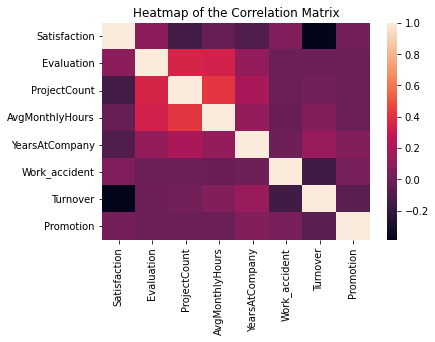

In [14]:
sns.heatmap(corr)
plt.title('Heatmap of the Correlation Matrix')

**Статистический тест на корреляцию**

Проверка гипотезы: Проверьте, существует ли существенная разница в среднем уровне удовлетворенности между сотрудниками, у которых была текучесть кадров, и всей совокупностью сотрудников.

Нулевая гипотеза: Нет никакой разницы в уровне удовлетворенности между сотрудниками, которые выполняли текучесть кадров, и всей совокупностью сотрудников.

Альтернативная гипотеза: Существует разница в уровне удовлетворенности между сотрудниками, которые выполняли текучесть кадров, и всей совокупностью сотрудников.

In [17]:
# давайте сравним среднее значение статистики текучести кадров и среднее значение удовлетворенности персонала
emp_population_satisfaction = df['Satisfaction'].mean()
emp_turnover_satisfaction = df[df['Turnover']==1]['Satisfaction'].mean()

print( 'The mean for the employee(entire) population is: ' + str(emp_population_satisfaction) )
print( 'The mean for the employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean for the employee(entire) population is: 0.6128335222348166
The mean for the employees that had a turnover is: 0.44009801176140917


In [18]:
import scipy.stats as stats

stats.ttest_1samp(a = df[df['Turnover']==1]['Satisfaction'], # Образец удовлетворенности сотрудников, у которых была текучесть кадров
                  popmean = emp_population_satisfaction)  # Удовлетворенность работников 

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

In [19]:
degree_freedom = len(df[df['Turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Левый квартиль

RQ = stats.t.ppf(0.975,degree_freedom)  # Правый Квартиль

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


**Результат теста**

Из приведенного выше T-критерия мы видим, что тестовая статистика находится в области отклонения, и, следовательно, мы приходим к выводу, что выборочные данные предоставляют достаточно доказательств в поддержку Альтернативной гипотезы.

Кроме того, значение p очень низкое и составляет менее 0,05, следовательно, мы можем отклонить Нулевую гипотезу.

# **Распределительные участки**




In [20]:
df.columns

Index(['Satisfaction', 'Evaluation', 'ProjectCount', 'AvgMonthlyHours',
       'YearsAtCompany', 'Work_accident', 'Turnover', 'Promotion',
       'Department', 'Salary'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Emploee AvgMonthlyHour Distribution')

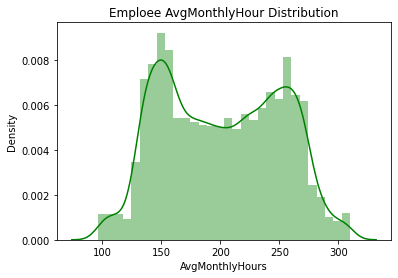

In [21]:
sns.distplot(df.AvgMonthlyHours,color='g').set_title('Emploee AvgMonthlyHour Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Employee Satisfaction Distribution')

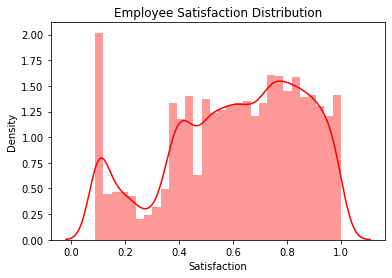

In [22]:
sns.distplot(df.Satisfaction,color ='r').set_title('Employee Satisfaction Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Employee Project Count Distribution')

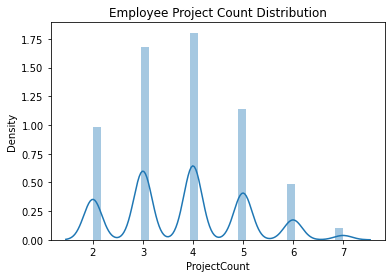

In [23]:
sns.distplot(df.ProjectCount).set_title('Employee Project Count Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


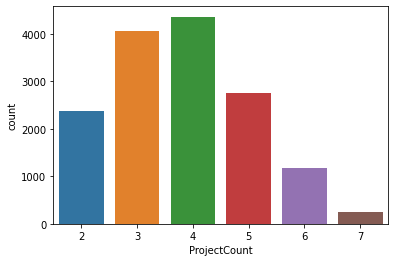

In [24]:
sns.countplot(df.ProjectCount)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Employee Evaluation Distribution')

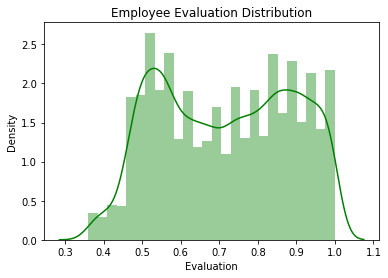

In [25]:
sns.distplot(df.Evaluation,color='g').set_title('Employee Evaluation Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Employee Tenure at Company')

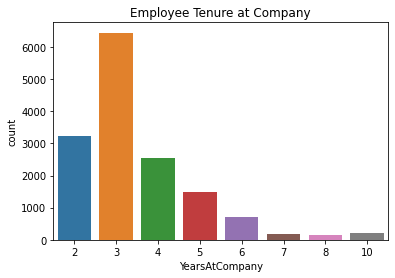

In [26]:
sns.countplot(df.YearsAtCompany).set_title('Employee Tenure at Company')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


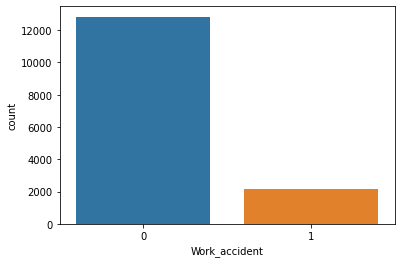

In [27]:
sns.countplot(df.Work_accident)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


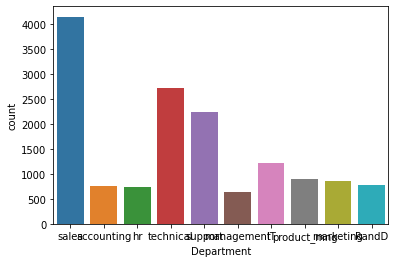

In [28]:
sns.countplot(df.Department)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


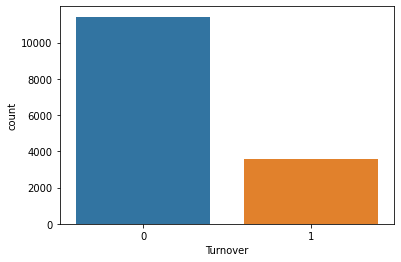

In [29]:
sns.countplot(df.Turnover)

* Среднемесячные часы: Бимодальное распределение сотрудников с более низкими и более высокими среднемесячными часами (менее 150 часов и более 250 часов)
* Удовлетворенность: Наблюдается огромный всплеск среди сотрудников с низкой удовлетворенностью и высокой удовлетворенностью.
* Оценка: Бимодальное распределение сотрудников для сотрудников с низкими оценками (менее 0,6) и высокими оценками (более 0,8)
Наибольшее количество сотрудников в компании приходится на отдел продаж.
* Количество сотрудников со стажем работы 3 года выше.
Число сотрудников, столкнувшихся с несчастным случаем на производстве, очень невелико.


# **Зарплата - текучести кадров**

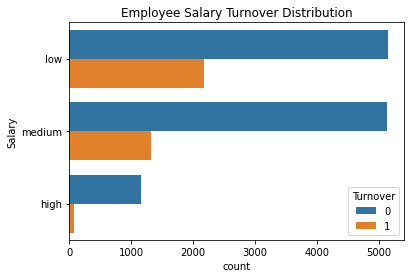

In [30]:
sns.countplot(y="Salary", hue='Turnover', data=df).set_title('Employee Salary Turnover Distribution');

**Вывод:**

Сотрудники с низкой и средней зарплатой с большей вероятностью покинут компанию. Замечено, что сотрудники с высокой зарплатой с наименьшей вероятностью покинут компанию.

# **Отдел - текучести кадров**

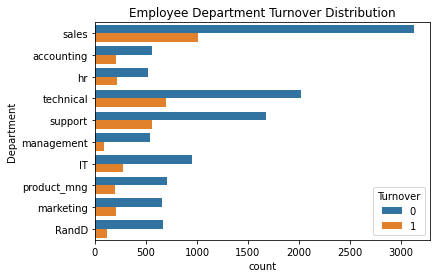

In [31]:
sns.countplot(y="Department", hue='Turnover', data=df).set_title('Employee Department Turnover Distribution');

  **Вывод:**

Текучесть кадров высока в отделах продаж, технического обслуживания, Поддержки. Сеть управленческих подразделений имеет наименьшую текучесть кадров.

# **Количество проектов в сравнении с оборотом**

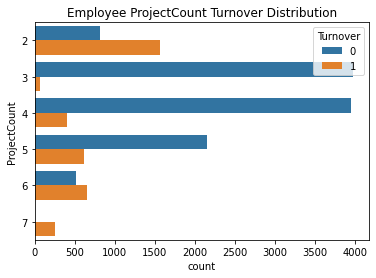

In [32]:
sns.countplot(y="ProjectCount", hue='Turnover', data=df).set_title('Employee ProjectCount Turnover Distribution');

**Вывод:**

Туронвер сотрудников высок для сотрудников с 2,6 и 7 проектами. Большинство сотрудников с 3,4,5 проектами не покинули компанию. Все сотрудники с 7 проектами покинули компанию.

# **Оценка в сравнении с оборотом**

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

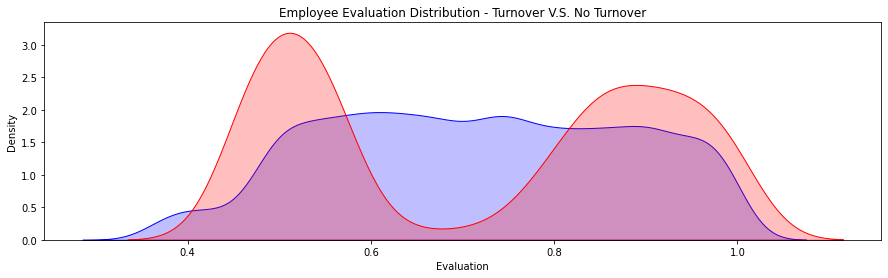

In [33]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['Turnover'] == 0),'Evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['Turnover'] == 1),'Evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

Сотрудники с низкой и высокой производительностью, как правило, чаще уходят из компании. Лучшее место для сотрудников, которые остались, находится в пределах 0,6-0,8 оценки.

# **Ежемесячные часы - оборот**

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

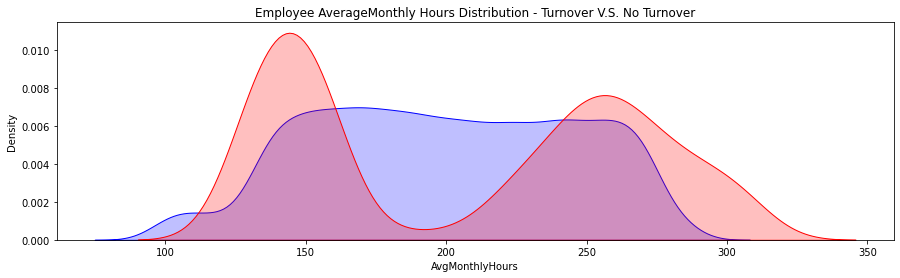

In [34]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Turnover'] == 0),'AvgMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['Turnover'] == 1),'AvgMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

Ежемесячные часы против оборота Сотрудники, у которых было меньше часов работы (~ 150 часов или меньше), покинули компанию больше сотрудников, у которых было слишком много часов работы (~ 250 или более), покинули компанию Уволившиеся сотрудники, как правило, были недостаточно загружены или перегружены работой.

# **Удовлетворенность - текучести кадров**

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

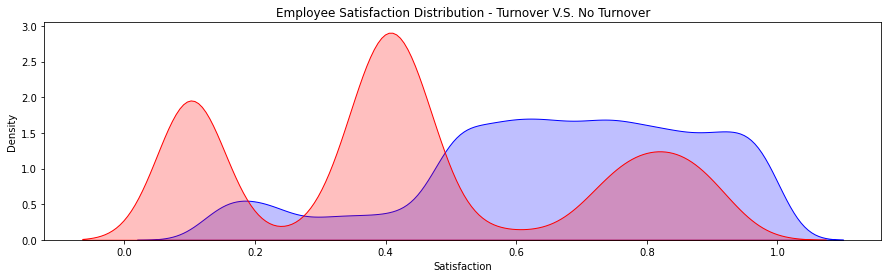

In [35]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Turnover'] == 0),'Satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['Turnover'] == 1),'Satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

Текучесть кадров по сравнению с годами Сотрудники компании с действительно низким уровнем удовлетворенности (0,2 или менее) покинули компанию больше сотрудников с низким уровнем удовлетворенности (0,3 ~ 0,5) покинули компанию больше сотрудников с действительно высоким уровнем удовлетворенности (0,7 или более) покинули компанию больше

# Оборот по сравнению с годами в компании


[Text(0, 0.5, 'Percent')]

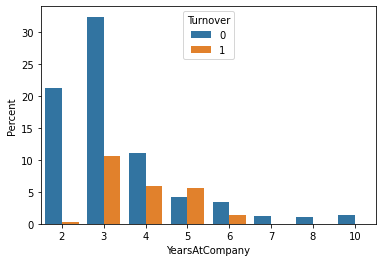

In [36]:
ax = sns.barplot(x="YearsAtCompany", y="YearsAtCompany", hue="Turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Более половины сотрудников с 4 и 5 годами работы покинули компанию.

# **Коэффициент текучести - текучести кадров**

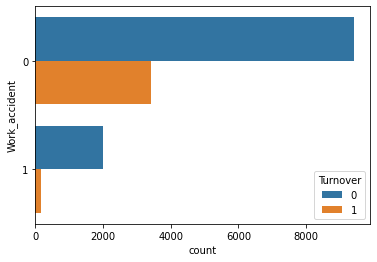

In [37]:
sns.countplot(y = 'Work_accident',hue='Turnover', data=df)

# **Продвижение по службе - оборота**

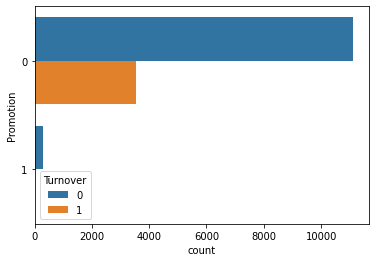

In [38]:
sns.countplot(y = 'Promotion',hue='Turnover', data=df)

Сотрудники, получившие повышение по службе, не стремились покидать компанию

# **Количество проектов в сравнении с оценкой**

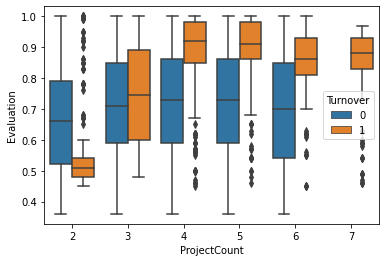

In [39]:
sns.boxplot(x="ProjectCount", y="Evaluation", hue="Turnover", data=df)

Похоже, что сотрудники, которые не покинули компанию, имели среднюю оценку около 70% даже при разных подсчетах проектов. Однако существует огромный перекос в количестве сотрудников, у которых была текучесть кадров. Это резко меняется после 3 подсчетов проектов. Сотрудники, у которых было два проекта и ужасная оценка, ушли. Ушли сотрудники с более чем 3 проектами и сверхвысокими оценками.

# **Удовлетворенность - Оценка.**




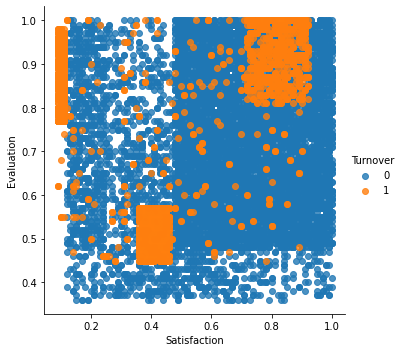

In [40]:
sns.lmplot(x='Satisfaction', y='Evaluation', data=df,
           fit_reg=False, # No regression line
           hue='Turnover')

Существует 3 отдельных кластера для сотрудников, которые покинули компанию

**Кластер 1:** (Трудолюбивый и Грустный сотрудник) Удовлетворенность была ниже 0,2, а оценки были выше 0,75, что может быть хорошим показателем того, что сотрудники, покинувшие компанию, были хорошими работниками, но чувствовали себя ужасно на своей работе.

**Кластер 2:**(Плохой и грустный сотрудник) Удовлетворенность составляет около 0,35~0,45, а оценки ниже ~0,58. Это можно было бы рассматривать как сотрудников, которые были плохо оценены и чувствовали себя плохо на работе.

**Кластер 3:** (Трудолюбивый и счастливый сотрудник) Удовлетворенность составляет от 0,7 до 1,0, а оценки превышают 0,8, что может означать, что сотрудники в этом кластере были "идеальными". Они любили свою работу, и их работа была высоко оценена.

# **Количество проектов - сред. часы**

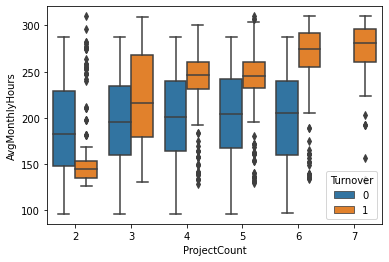

In [41]:
sns.boxplot(x="ProjectCount", y="AvgMonthlyHours", hue="Turnover", data=df)

Похоже, что среднестатистические сотрудники, которые остались, работали около 200 часов в месяц. Те, у кого был оборот, работали около 250 часов в месяц или 150 часов в месяц

**K- Означает кластеризацию текучести кадров**

---



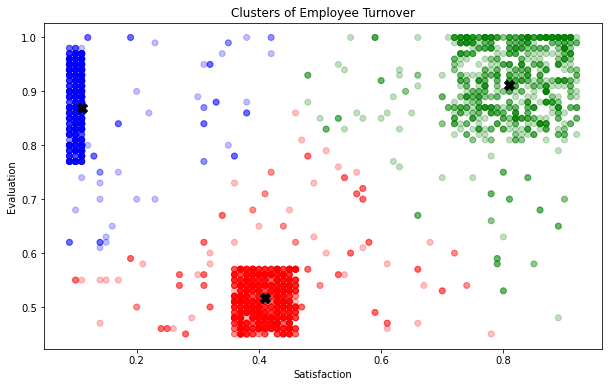

In [42]:
from sklearn.cluster import KMeans

# Постройте график и создайте 3 кластера текучести кадров
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.Turnover==1][["Satisfaction","Evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Satisfaction",y="Evaluation", data=df[df.Turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

In [43]:
# Создание Фиктивных Переменных
department = pd.get_dummies(data = df['Department'],prefix ='Dep')
salary = pd.get_dummies(data = df['Salary'], prefix = 'Sal')
df.drop(['Department','Salary'],axis = 1, inplace = True)
df = pd.concat([df, department, salary],axis = 1)

**Модель данных**


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report, precision_score, recall_score, confusion_matrix,precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [45]:
y = df['Turnover']
X = df.drop('Turnover',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15 , random_state = 123, stratify = y)

In [46]:
# Логистическая регрессия

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty ='l2', C = 1)
model.fit(X_train,y_train)
print("Accuracy",round(accuracy_score(y_test, model.predict(X_test)),2))
print(confusion_matrix(y_test, model.predict(X_test)))

Accuracy 0.79
[[1574  140]
 [ 328  208]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [47]:
# Классификатор дерева решений логистической регрессии
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = tree.DecisionTreeClassifier(max_depth=3, min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_accuracy = accuracy_score(y_test, dtree.predict(X_test))
print("Decision Tree Accuracy =" ,dt_accuracy)
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))
print(confusion_matrix(y_test, dtree.predict(X_test)))



 ---Decision Tree Model---
Decision Tree Accuracy = 0.944
Decision Tree AUC = 0.93
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1714
           1       0.88      0.89      0.88       536

    accuracy                           0.94      2250
   macro avg       0.92      0.93      0.92      2250
weighted avg       0.94      0.94      0.94      2250

[[1646   68]
 [  58  478]]


In [48]:
from sklearn.ensemble import RandomForestClassifier #Случайный Лесной классификатор
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
print("Accuracy =", accuracy_score(y_test, rf.predict(X_test)))
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))
print(confusion_matrix(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Accuracy = 0.9862222222222222
Random Forest AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1714
           1       0.99      0.96      0.97       536

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.98      2250
weighted avg       0.99      0.99      0.99      2250

[[1707    7]
 [  24  512]]


In [49]:
# Классификатор Ada Boost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
print("Accuracy =", accuracy_score(y_test,ada.predict(X_test)))
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))
confusion_matrix(y_test, ada.predict(X_test))



 ---AdaBoost Model---
Accuracy = 0.9506666666666667
AdaBoost AUC = 0.93
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1714
           1       0.91      0.88      0.89       536

    accuracy                           0.95      2250
   macro avg       0.94      0.93      0.93      2250
weighted avg       0.95      0.95      0.95      2250



array([[1667,   47],
       [  64,  472]])

In [50]:
print("-----------Accuracy comparison---------------")
print("Accuracy of Logistic regression model", accuracy_score(y_test,model.predict(X_test)))
print("Accuracy of Decision Tree model", accuracy_score(y_test,dtree.predict(X_test)))
print("Accuracy of Random Forest model", accuracy_score(y_test,rf.predict(X_test)))
print("Accuracy of AdaBoost model", accuracy_score(y_test,ada.predict(X_test)))

-----------Accuracy comparison---------------
Accuracy of Logistic regression model 0.792
Accuracy of Decision Tree model 0.944
Accuracy of Random Forest model 0.9862222222222222
Accuracy of AdaBoost model 0.9506666666666667


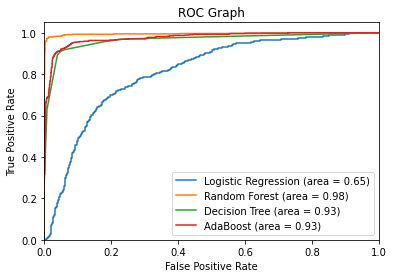

In [51]:
# ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, model.predict(X_test)))

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % roc_auc_score(y_test, rf.predict(X_test)))

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % roc_auc_score(y_test, dtree.predict(X_test)))

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % roc_auc_score(y_test, ada.predict(X_test)))


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

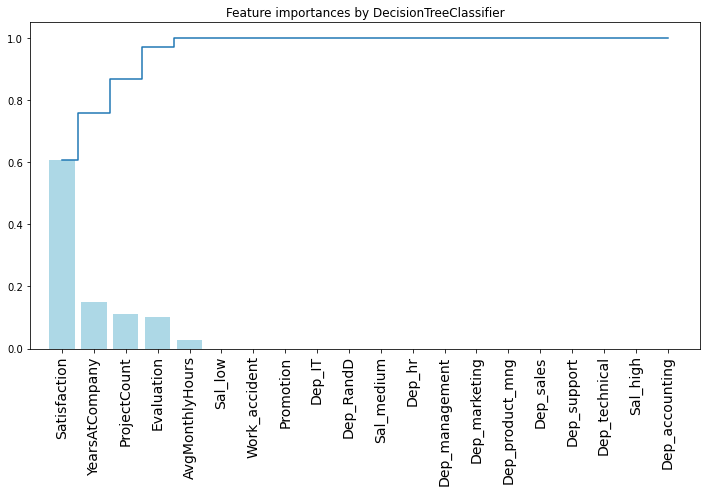

In [52]:
# Feature Importance

plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['Turnover'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# **Интерпретация данных**

Удовлетворенность сотрудников, годы работы в компании и оценка были тремя основными факторами, определяющими текучесть кадров.

Сотрудники с низкой или средней зарплатой с большей вероятностью покинут компанию. Замечено, что сотрудники с высокой зарплатой с наименьшей вероятностью покинут компанию.
Текучесть кадров высока в отделах продаж, технического обслуживания, Поддержки. Сеть управленческих подразделений имеет наименьшую текучесть кадров.
Туронвер сотрудников высок для сотрудников с 2,6 и 7 проектами. Большинство сотрудников с 3,4,5 проектами не покинули компанию. Все сотрудники с 7 проектами покинули компанию.
Сотрудники с низкой и высокой производительностью, как правило, чаще покидают компанию. Лучшее место для сотрудников, которые остались, находится в пределах 0,6-0,8 оценки.
Сотрудники, у которых было меньше часов работы (150 часов или меньше), чаще уходили из компании. Сотрудники, у которых было слишком много часов работы (250 или более), уволились из компании. Уволившиеся сотрудники, как правило, были недостаточно или перегружены работой.
Работники